In [2]:
import os
import pandas as pd

# Path to the folder where the CSV files are stored
folder_path = '/home/ndo/vardict_ML/mergeDf_pre_filter_FN'

# Initialize an empty dictionary to store the dataframes
merge_dfs = {}

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file_name.endswith('_df.csv'):
        # Extract the sample_id from the file name by removing the '_df.csv' part
        sample_id = file_name.replace('_df.csv', '')
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Add the DataFrame to the merge_dfs dictionary
        merge_dfs[sample_id] = df

# Now the merge_dfs dictionary contains the original DataFrames
print("All DataFrames loaded into merge_dfs")

All DataFrames loaded into merge_dfs


In [6]:
merge_dfs['SRR13586007']

,CHROM,POS,REF_GIAB,ALT_GIAB,SAMPLE,TYPE,DP,VD,AF,BIAS,...,HICNT,HICOV,LSEQ,RSEQ,DUPRATE,SPLITREAD,SPANPAIR,REF_S,ALT_S,VAR_CATE
0,chr1,783175,T,C,SRR13586007_intersected,SNV,4.0,4.0,1.00,0:2,...,4.0,4.0,CTTAGGTAATATATAGGACA,GAGCAGAGAGGAGGCACGTG,0.0,0.0,0.0,T,C,TP
1,chr1,784860,T,C,SRR13586007_intersected,SNV,6.0,6.0,1.00,0:2,...,6.0,6.0,CGTGAGAATCTTGGCAGAAC,ACTTTAATCAAGAGGTTTAG,0.0,0.0,0.0,T,C,TP
2,chr1,785417,G,A,SRR13586007_intersected,SNV,2.0,2.0,1.00,0:0,...,2.0,2.0,TCTTTGAGATTGCCCCCTCC,AAACAGTAAGAACTTTCAAA,0.0,0.0,0.0,G,A,TP
3,chr1,797392,G,A,SRR13586007_intersected,SNV,2.0,2.0,1.00,0:0,...,2.0,2.0,CACCATTTGAAGTACCTGAT,CCCTTTTAATGCTGTAATGC,0.0,0.0,0.0,G,A,TP
4,chr1,798618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,T,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385128,chr9,138217446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,T,FP
3385129,chr9,138217868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,C,FP
3385130,chr9,138219722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,G,FP
3385131,chr9,138221688,A,G,SRR13586007_intersected,SNV,4.0,3.0,0.75,0:2,...,3.0,4.0,ATGTGAGTTTTCACAACCGT,TTTTAAGTGTAAATACTGGA,0.0,0.0,0.0,NaN,NaN,FN


In [3]:
fn_df = {}
for dataset_id, m_df in merge_dfs.items():
    fn = m_df[m_df['VAR_CATE'] == "FN"]
    fn = fn[['CHROM', 'POS']]
    #change the name of pos column

    fn = fn.rename(columns={"POS": "END"})

    #add end column for the dataframe

    fn['START'] = fn['END'] - 1

    columns_titles = ["CHROM","START","END"]
    fn=fn.reindex(columns=columns_titles)

    fn_df[dataset_id] = fn


In [4]:
fn_df

{'SRR13586106':         CHROM      START        END
 80       chr1     861658     861659
 90       chr1     883054     883055
 91       chr1     883134     883135
 92       chr1     883162     883163
 93       chr1     883168     883169
 ...       ...        ...        ...
 3365593  chr9  138181526  138181527
 3365603  chr9  138186988  138186989
 3365604  chr9  138187071  138187072
 3365605  chr9  138187673  138187674
 3365606  chr9  138187690  138187691
 
 [7173 rows x 3 columns]}

In [6]:
# Convert the dataframe to a BED file

for dataset_id, fn in fn_df.items():
    fn.to_csv(f"/home/ndo/vardict_ML/all_FN/all_fn_{dataset_id}.bed", sep='\t', header=False, index=False)

In [ ]:
# %%bash

# # Variables
# path1="/home/ndo/nextflow/outDir/SampleBed"
# path2="/home/ndo/nextflow_SE/outDir/SampleBed"
# path3="/home/ndo/vardict_ML/sample_bed"

# # Ensure path3 exists
# mkdir -p "$path3"

# # Copy files from path1 to path3
# cp "$path1"/* "$path3"/

# # Copy files from path2 to path3
# cp "$path2"/* "$path3"/

# echo "Files copied successfully from path1 and path2 to path3."



In [7]:
%%bash


# Variables
dataset_id=SRR13586106
path1="/home/ndo/vardict_ML/all_FN/all_fn_${dataset_id}.bed"
path2="/home/ndo/vardict_ML/sample_bed/${dataset_id}_bam.bed"
output_path="/home/ndo/vardict_ML/true_FN"

# Ensure the output directory exists
mkdir -p "$output_path"


bedtools intersect -a "$path1" -b "$path2" > "$output_path/true_FN_${dataset_id}.bed"


In [3]:
import os
import pandas as pd

# Directory containing the bed files
folder_path = '/home/ndo/vardict_ML/true_FN/'

# Initialize an empty dictionary to store dataframes
dataframes = {}

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.bed'):  # Ensure we're only processing .bed files
        # Extract dataset_id from the filename
        dataset_id = filename.split('_')[-1].replace('.bed', '')

        # Build the full file path
        file_path = os.path.join(folder_path, filename)

        # Read the .bed file into a dataframe
        fn = pd.read_csv(file_path, sep='\t', header=None)

        # Rename columns according to the desired format
        fn.rename(columns={0: 'CHROM', 1: 'START', 2: 'END'}, inplace=True)
        
        # Drop the 'START' column
        fn.drop(columns=['START'], inplace=True)

        # Rename 'END' to 'POS'
        fn.rename(columns={'END': 'POS'}, inplace=True)

        # Store the dataframe in the dictionary with the dataset_id as the key
        
        dataframes[dataset_id] = fn

# Now `dataframes` contains a dictionary where keys are dataset_ids and values are dataframes


In [4]:
true_fn_bed = dataframes
true_fn_bed.keys()

dict_keys(['SRR13586007', 'SRR13586011', 'SRR13586012', 'SRR13586013', 'SRR13586014', 'SRR13586015', 'SRR13586016', 'SRR13586018', 'SRR13586019', 'SRR13586020', 'SRR13586026', 'SRR13586106'])

In [5]:
final_df = {}
for dataset_id, m_df in merge_dfs.items():
    FN = m_df[m_df['VAR_CATE']=='FN']
    FN_bed = true_fn_bed[dataset_id]
    FN = pd.merge(FN, fn, how="inner", on=["CHROM", "POS"])
    TP = m_df[m_df['VAR_CATE']=='TP']
    FP = m_df[m_df['VAR_CATE']=='FP']
    TP['labels'] = 0
    FP['labels'] = FN['labels'] = 1
    m_df = pd.concat([TP, FP, FN], ignore_index=True)
    final_df[dataset_id] = m_df

/tmp/ipykernel_16516/3806289103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TP['labels'] = 0
/tmp/ipykernel_16516/3806289103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FP['labels'] = FN['labels'] = 1
/tmp/ipykernel_16516/3806289103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
final_df.keys()

dict_keys(['SRR13586007', 'SRR13586016', 'SRR13586011', 'SRR13586015', 'SRR13586014', 'SRR13586013', 'SRR13586012', 'SRR13586018', 'SRR13586019', 'SRR13586020', 'SRR13586026', 'SRR13586106'])

In [11]:
final_df['SRR13586106'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422911 entries, 0 to 3422910
Data columns (total 37 columns):
 #   Column     Dtype  
---  ------     -----  
 0   CHROM      object 
 1   POS        int64  
 2   REF_GIAB   object 
 3   ALT_GIAB   object 
 4   SAMPLE     object 
 5   TYPE       object 
 6   DP         float64
 7   VD         float64
 8   AF         float64
 9   BIAS       object 
 10  REFBIAS    object 
 11  VARBIAS    object 
 12  PMEAN      float64
 13  PSTD       float64
 14  QUAL       float64
 15  QSTD       float64
 16  SBF        float64
 17  ODDRATIO   float64
 18  MQ         float64
 19  SN         float64
 20  HIAF       float64
 21  ADJAF      float64
 22  SHIFT3     float64
 23  MSI        float64
 24  MSILEN     float64
 25  NM         float64
 26  HICNT      float64
 27  HICOV      float64
 28  LSEQ       object 
 29  RSEQ       object 
 30  DUPRATE    float64
 31  SPLITREAD  float64
 32  SPANPAIR   float64
 33  REF_S      object 
 34  ALT_S      object 

In [13]:
final_df['SRR13586106']['VAR_CATE'].value_counts()

VAR_CATE
FP    3066705
TP     291789
FN      64417
Name: count, dtype: int64

In [14]:
final_df['SRR13586106']['labels'].value_counts()

labels
1    3131122
0     291789
Name: count, dtype: int64

In [6]:
explore_df = pd.concat(final_df.values(), ignore_index=True)

In [7]:
explore_df = explore_df[['REF_S', 'ALT_S']]

In [9]:
# Drop rows with NaN in REF_S and ALT_S
df_filtered = explore_df.dropna(subset=['REF_S', 'ALT_S'])

# Define valid values for REF_S and ALT_S
valid_values = ['A', 'T', 'C', 'G']

# Filter the dataframe to keep only rows where REF_S and ALT_S have valid values
df_explore = df_filtered[df_filtered['REF_S'].isin(valid_values) & df_filtered['ALT_S'].isin(valid_values)]

In [11]:
df_explore
df_test = df_explore[:100]

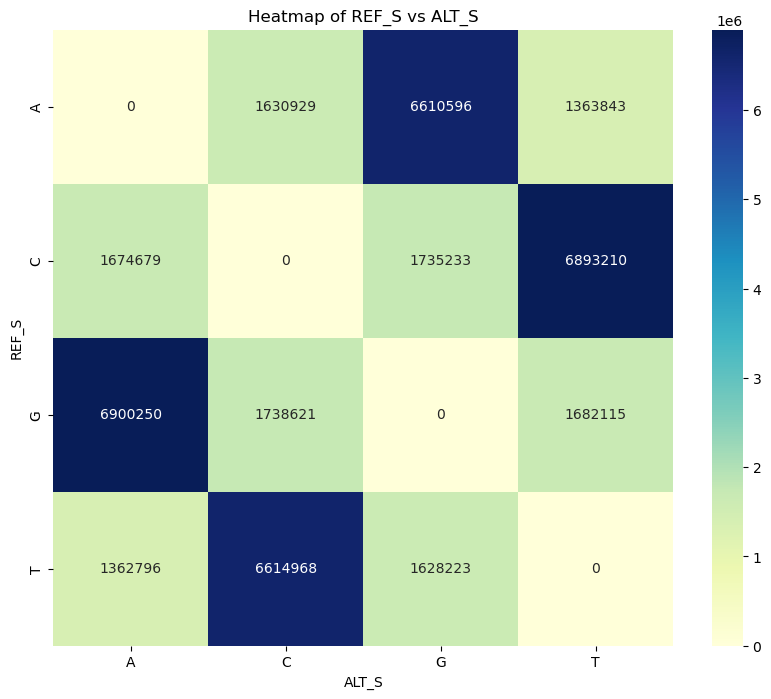

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_explore is your dataframe containing REF_S and ALT_S
# df_explore = pd.read_csv('your_data.csv')  # Example if you're reading from a CSV

# Create a cross-tabulation between REF_S and ALT_S
crosstab = pd.crosstab(df_explore['REF_S'], df_explore['ALT_S'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Set plot labels and title
plt.xlabel('ALT_S')
plt.ylabel('REF_S')
plt.title('Heatmap of REF_S vs ALT_S')

# Show the plot
plt.show()


In [ ]:
# test_df.drop(['POS','CHROM','REF_GIAB','ALT_GIAB','REF_S','ALT_S','SAMPLE', 'TYPE'], axis= 1, inplace=True)
# # Select object columns
# object_columns = test_df.select_dtypes(include=['object']).columns

# # Drop object columns
# test_df = df.drop(columns=object_columns)

In [13]:
non_object_columns = [
    "DP", "VD", "AF", "PMEAN", "PSTD", "QUAL", "QSTD", 
    "SBF", "ODDRATIO", "MQ", "SN", "HIAF", "ADJAF", "SHIFT3", 
    "MSI", "MSILEN", "NM", "HICNT", "HICOV", "DUPRATE", 
    "SPLITREAD", "SPANPAIR",'labels'
]

# test_df=test_df[non_object_columns]
# test_df.info()

In [15]:
# Fill NaN values with the average of other rows for specified columns
columns_to_fill = ['VD','DP', 'AF', 'PMEAN', 'PSTD', 'QSTD', 'SBF', 'ODDRATIO', 
                   'MQ', 'SN', 'HIAF', 'ADJAF', 'SHIFT3', 'MSI', 'MSILEN', 
                   'NM', 'HICNT', 'HICOV', 'DUPRATE', 'SPLITREAD', 'SPANPAIR']

for id, df in final_df.items():
    df = df[non_object_columns]

    for col in columns_to_fill:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill NaN values in column 'QUAL' with the maximum value in that column
    df['QUAL'].fillna(df['QUAL'].max(), inplace=True)
    final_df[id] = df
    


/tmp/ipykernel_15090/207157138.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_15090/207157138.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [16]:
final_df['SRR13586106'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422911 entries, 0 to 3422910
Data columns (total 23 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DP         float64
 1   VD         float64
 2   AF         float64
 3   PMEAN      float64
 4   PSTD       float64
 5   QUAL       float64
 6   QSTD       float64
 7   SBF        float64
 8   ODDRATIO   float64
 9   MQ         float64
 10  SN         float64
 11  HIAF       float64
 12  ADJAF      float64
 13  SHIFT3     float64
 14  MSI        float64
 15  MSILEN     float64
 16  NM         float64
 17  HICNT      float64
 18  HICOV      float64
 19  DUPRATE    float64
 20  SPLITREAD  float64
 21  SPANPAIR   float64
 22  labels     int64  
dtypes: float64(22), int64(1)
memory usage: 600.6 MB


In [17]:
merged_df = pd.concat(final_df.values(), ignore_index=True)

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422911 entries, 0 to 3422910
Data columns (total 23 columns):
 #   Column     Dtype  
---  ------     -----  
 0   DP         float64
 1   VD         float64
 2   AF         float64
 3   PMEAN      float64
 4   PSTD       float64
 5   QUAL       float64
 6   QSTD       float64
 7   SBF        float64
 8   ODDRATIO   float64
 9   MQ         float64
 10  SN         float64
 11  HIAF       float64
 12  ADJAF      float64
 13  SHIFT3     float64
 14  MSI        float64
 15  MSILEN     float64
 16  NM         float64
 17  HICNT      float64
 18  HICOV      float64
 19  DUPRATE    float64
 20  SPLITREAD  float64
 21  SPANPAIR   float64
 22  labels     int64  
dtypes: float64(22), int64(1)
memory usage: 600.6 MB


In [19]:
# Writing the merged DataFrame to a CSV file with column names
# merged_df.to_parquet('/home/ndo/vardict_ML/processed_data.parquet')
merged_df.to_parquet('/home/ndo/vardict_ML/processed_data_test.parquet')